# Estimators: Fundamentals and Exercises

## Table of Contents
* [Introduction](#Introduction)
* [Requirements](#Requirements) 
  * [Knowledge](#Knowledge) 
  * [Modules](#Python-Modules)
* [Exercise: Pen and Paper Calculation](#Pen-and-Paper-Calculation)
* [Exercise: Visualization of the Column and Null Space](#Implementation-of-Basic-Operations)
* [Summary and Outlook](#Summary-and-Outlook)
* [Literature](#Literature) 
* [Licenses](#Licenses) 

## Introduction

This notebook describes some fundamental properties of estimators, such as bias, variance and mean squared error.
The exercises help the reader to understand the topics.

### Python Modules

In [ ]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

## Requirements

As requirements you need fundamental knowledge about probabilities.


It's recommend to study the videos on Khan academy about [sampling distributions](https://www.khanacademy.org/math/ap-statistics/sampling-distribution-ap/what-is-sampling-distribution/v/introduction-to-sampling-distributions).


## Fundaments of Estimators

#### Data

$$
\mathcal D = \{ X_1, X_2, \dots X_n\}
$$

Here we consider the data as random variables (frequentist view).

Also, the Data is iid (independent and identically distributed):

- independent: the outcome of one observation does 
    not effect the outcome of another observation
- identically distributed, i.e. all $X_i$ are drawn from the same probability distribution. 

#### Definition of a statistic

A __statistic__ is a random variable $S$ that is a function of the data $\mathcal D$, i.e. 
$$
S = f \left(\mathcal D \right)
$$


An __estimator__ is a statistic attended to approximate a parameter governing the distribution of the data $\mathcal D$.



Notation: $\hat \theta$ is an estimator of $\theta$
<!-- 1. $\hat \theta_n$ is an estimator of $\theta$ -->

#### Bias of an estimator

The __bias__ of an estimator $\hat \theta$ is 
$$
\text{bias}(\hat \theta) := \mathbb E\left[ \hat \theta \right] - \theta
$$
Difference between mean estimated value and the true value of $\theta$. 

The expectation (mean) is with respect to (w.r.t.) to different data sets $\mathcal D$. 


An estimator is __unbiased__ if the bias is zero, i.e. 
$$\text{bias}(\hat \theta)= 0$$ 
or
$$
\mathbb E\left[ \hat \theta \right] = \theta
$$



#### Variance of an estimator

"How much does the estimated value change for different data sets."

$$
var(\hat \theta) = \mathbb E \left[\left(\mathbb E [\hat \theta] - \hat \theta\right)^2\right]
$$

or

\begin{align}
var(\hat \theta) 
 &= \mathbb E \left[\left(\mathbb E [\hat \theta] - \hat \theta\right)^2\right] \\
 &= \mathbb E \left[(\mathbb E [\hat \theta])^2 -2\mathbb E [\hat \theta] \hat \theta+ \hat \theta^2\right] \\
 &= (\mathbb E [\hat \theta])^2 - 2 \mathbb E [\hat \theta]\mathbb E [\hat \theta] + \mathbb E [\hat \theta^2] \\
 &= \mathbb E [\hat \theta^2]  - (\mathbb E [\hat \theta])^2
\end{align}


#### Example

Data generating distribution is a univariate Gaussian:

$$
X_i \sim \mathcal N(\mu, \sigma^2)
$$

The Gaussian has two parameters which we want to estimate from the data:
 - Mean: $\mu = \mathbb E \left[ X\right]$
 - Variance of the Gaussian $\sigma^2 = \mathbb E \left[ (X - \mu)^2 \right]$
 
Note that the technical term variance is used here for two different concepts
- variance of the estimator $var(\hat \theta)$ and 
- variance of the Gaussian $\sigma^2$.

 
We can use the following estimators of $\mu$ and $\sigma^2$:

- Sample mean is an estimator of the mean $\mu$:     
$$\hat \mu = \frac{1}{n} \sum_{i=1}^n X_i =: \bar X  $$

- (Biased) sample variance is an estimator of the variance $\sigma^2$:     
$$\hat \sigma_b^2 = \frac{1}{n}\sum_{i=1}^n (X_i- \bar X)^2$$

- (Unbiased) sample variance is an estimator of the variance $\sigma^2$:     
$$\hat \sigma_u^2 = \frac{1}{n-1} \sum_{i=1}^n (X_i- \bar X)^2$$


Estimator $\hat \mu$ is unbiased:

$$
\mathbb E \left[ \hat \mu \right] = \mathbb E \left[ \frac{1}{n} \sum_i X_i \right]  
= \frac{1}{n} \sum_i   \mathbb E \left[ X_i\right] = \frac{1}{n} \sum_i  \mu = \mu
$$

Variance of the estimator $\hat \mu$

$$
\begin{align}
var(\hat \mu) & := \mathbb E \left[ (\hat \mu  - \mathbb E [\hat \mu])^2 \right]\\
&=\mathbb E \left[ (\bar X - \mu)^2 \right] \\
&=\mathbb E \left[ \left(1/n \sum_i X_i - \mu\right)^2 \right] \\
& =\mathbb E \left[ \left(1/n \sum_i X_i\right)^2 - 2\mu /n \sum_i X_i + \mu ^2 \right] \\
& = \mathbb E \left[ \bar X^2 \right] - 2 \mu/n \sum_i \mathbb E \left[ X_i \right] + \mu^2\\ 
& = \mathbb E \left[ \bar X^2 \right] - 2 \mu \mu  + \mu^2\\ 
& = \mathbb E \left[ \bar X^2 \right] - \mu^2\\ 
\end{align}
$$ 

This derivation was analog to the derivation of the alternative definition of the variance.


For a more in depth discussion of the example and 
the bias and variance of the estimators $\hat \sigma_b^2$ and $\hat \sigma_u^2$, see

- https://onlinecourses.science.psu.edu/stat414/node/166
- https://onlinecourses.science.psu.edu/stat414/node/192


<!--
Variance of $\sigma_b^2$:

Note:
$$
\begin{align}
\hat \sigma_b^2 & = \frac{1}{n}\sum_{i=1}^n \left(X_i- \bar X\right)^2 = \frac{1}{n}\sum_{i=1}^n \left(X_i^2 - 2 X_i \bar X+ \bar X^2\right) =
 \frac{1}{n}\sum_{i=1}^n X_i^2 - \frac{1}{n}\sum_{i=1}^n \left( 2 X_i \bar X \right) + \bar X^2 \\
 & = \frac{1}{n}\sum_{i=1}^n X_i^2 - 2 \bar X^2  + \bar X^2 = \frac{1}{n}\sum_{i=1}^n X_i^2 - \bar X^2  
\end{align}
$$

and with the alternative definition of the variance:
$$
Var(X) = \sigma^2 = \mathbb E \left[ X^2 \right] - \mu^2 =\frac{\sigma^2}{n} 
$$
-->


#### Mean squared error of an estimator

$$
mse(\hat \theta) = \mathbb E \left[ \left(\theta - \hat \theta ]\right)^2 \right]
$$

#### Relation between mean squared error, bias and variance

Bias-Variance decomposition of the mean squared error:

$$\begin{align}
mse(\hat \theta) &= \mathbb E \left[ \left(\theta - \hat \theta ]\right)^2 \right] \\
  &= \mathbb E [ \theta^2] - 2 \mathbb E[\theta \hat \theta] + \mathbb E[\hat \theta^2]\\
  &= \theta^2 - 2 \mathbb \theta \mathbb E [\hat \theta] + \mathbb E[\hat \theta^2] + (\mathbb E [\hat \theta])^2 - (\mathbb E [\hat \theta])^2\\
  &= \left(\theta^2 - 2 \mathbb \theta \mathbb E [\hat \theta]  + (\mathbb E [\hat \theta])^2  \right) + \left( \mathbb E[\hat \theta^2] - (\mathbb E [\hat \theta])^2 \right)\\
  &=\left(\mathbb E\left[ \hat \theta \right] - \theta  \right)^2  + var(\hat \theta) \\
  &= \left(\text{bias}(\hat \theta)\right)^2 + var(\hat \theta) 
\end{align}$$



#### Sufficient Statistics

A statistic $S$ is sufficient if

$$
p(\hat \theta \mid \mathcal D) = p\left(\hat \theta \mid S(\mathcal D)\right)
$$

For estimation of the parameters all information is "compressed" in the sufficient statistic. 

### Example

We have a bowl with enumerated balls from 1 to 100 (population).

As sample we draw 5 balls (i.e. five numbers) with replacement.

A sampling distribution is the distribution of a statistic (here  $\mu_1$), that is obtained by repeatedly drawing a large number of samples from a specific population. This distribution allows you to determine the probability of obtaining the sample statistic.

In [ ]:
population = np.arange(1,101,1, dtype=np.int32) 

In [ ]:
true_median = np.median(population)
true_median # unknown - we want to estimate this from a sample

In [ ]:
q75, q25 = np.percentile(population, [75 ,25])
true_IQR = q75 - q25
true_IQR # unknown - we want to estimate this from a sample

We want decide:
- Is the median of a sample an unbiased estimator of the median of the population?
- Is the IQR (inter quatile range) of a sample an unbiased estimator IQR of the population?

In [ ]:
samples = []
for i in range(10000): # without loop?
    samples.append(np.random.choice(population, size=(5), replace=True))

samples = np.array(samples)
sample_distribution_median = np.median(samples, axis=1)
q75, q25 = np.percentile(samples, [75 ,25], axis=1)
sample_distribution_inter_quartile_range = q75 -q25

In [ ]:
plt.figure(figsize=(10,8))
plt.title("approximated sample distribution")
plt.hist(sample_distribution_median, bins=20, alpha=0.4, label="median", density=True)
plt.hist(sample_distribution_inter_quartile_range, bins=20, alpha=0.4, label="inter quartile range", density=True)
plt.axvline(x=true_median, c="black", label="true median")
plt.axvline(x=true_IQR, c="gray", label="true IQR")
plt.ylabel("rel. frequency")
plt.legend();  

In [ ]:
all_sample_means = []
sample_sizes = (1,2,4,16, 32)
for j in sample_sizes: # TODO: without loops
    samples = []
    for i in range(20000): # without loop?
        samples.append(np.random.choice(population, size=(j), replace=True))
    means = np.array(samples).mean(axis=1)
    all_sample_means.append(means)

In [ ]:
plt.figure(figsize=(10,8))
plt.title("approximated means")
for i, j in enumerate(sample_sizes):
    plt.hist(all_sample_means[i], bins=20, alpha=0.4, label="sample size:"+str(j), density=True)
plt.axvline(x=population.mean(), c="black", label="population mean")
plt.ylabel("rel. frequency")
plt.legend();  

In [ ]:
var_mean_estimator_16 = np.var(all_sample_means[3], ddof=1)
var_mean_estimator_32 = np.var(all_sample_means[4], ddof=1)
print ("Variance of estimator with sample size 16:", var_mean_estimator_16)
print ("Variance of estimator with sample size 32:", var_mean_estimator_32)
print ("quotient" , var_mean_estimator_32 / var_mean_estimator_16)

- Note that the variance of the estimator nearly halfs if the sample size is doubled.
- Note if you change the sampling procedure from replace=True to replace=False this statement holds not any more. 

### Exercises

As preparation solve the multiple choise questions: [biased-unbiased-estimators](https://www.khanacademy.org/math/ap-statistics/sampling-distribution-ap/what-is-sampling-distribution/e/biased-unbiased-estimators).

#### Exercise

Consider independent random variables $X_1$, $X_2$, and $X_3$ with
- $\mathbb E[X_1] = 1$, $std[X_1] = 4$
- $\mathbb E[X_2] = 2$, $var[X_2] = 9$
- $\mathbb E[X_3] = 3$, $std[X_3] = 5$

$var$ is the variance and $std$ the standard deviation of the random variables.

Note the variance of a random variable is $var(X) = \mathbb E[(X - \mathbb E(X))^2]$.

Show from this definition that 
$var(\alpha X) = \alpha^2 var[X]$

Calculate
1. $\mathbb E[4X_1 + 2X_2 − 6X_3]$ 
2. $Var[4X_1 + 2X_2 − 6X_3]$ 

#### Exercise

Let $X_1, X_2, \dots , X_n$ denote a i.i.d. random sample from a population with true mean $\mu=\mathbb E[X]$ and true variance $\sigma^2_X= var(X)=\mathbb E \left[X^2 \right] - \mu^2 $.

Consider the following estimators of $\mu$:

1. $\hat \mu_1 = \frac{1}{n}\left(2 X_1 + 2 X_2 + \sum_{i=3}^{n} X_i\right)$
2. $\hat \mu_2 = \frac{1}{2 + n}\left(2 X_1 + 2 X_2 + \sum_{i=3}^{n} X_i\right)$
3. Draw two different $X_i$ and $X_j$ with $i\neq j$ from the sample and calulate $\hat \mu_3 = \frac{X_i + X_j}{2}$: 

Calulate the bias of all three estimators. Are the estimators unbiased?

Calculate the variance for $\hat \mu_3$.


#### Exercise

Sample 10000 data sets from a normal distribution $\mathcal N(\mu=3, \sigma^2=4)$ with 8 data points each.

Plot a normalized histogram of the data.

Plot in the same diagram a histogram of the estimator values of $\mu_1$.
This histogram visualizes the _sampling distribution_.

Can you read out the bias and the variance from the plot? 

Estimate the bias and variance of the estimator $\mu_1$ from the data.

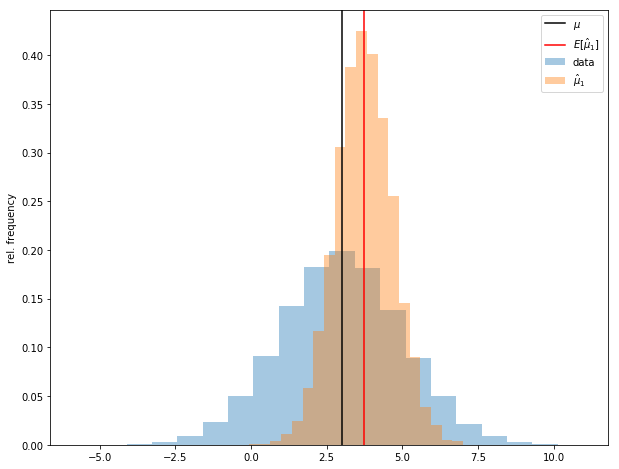

## Literature

<table>
    <tr>
        <td>
            <a name="JAY09"></a>[STR19]
        </td>
        <td>
            Jaynes, E. T. (2007), "Probability Theory: The logic of science (5 ed.)", Cambridge University Press, 2007.
        </td>
    </tr>
</table>

## Summary and Outlook

This exercise covered some fundamentals of statistical estimators.

## Licenses

### Notebook License (CC-BY-SA 4.0)

*The following license applies to the complete notebook, including code cells. It does however not apply to any referenced external media (e.g., images).*

Estimators: Fundamentals and Exercises <br/>
by Christian Herta <br/>
is licensed under a [Creative Commons Attribution-ShareAlike 4.0 International License](http://creativecommons.org/licenses/by-sa/4.0/).<br/>
Based on a work at https://gitlab.com/deep.TEACHING.


### Code License (MIT)

*The following license only applies to code cells of the notebook.*

Copyright 2019 Christian Herta

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.